### Exploratory Data Analysis -- Summary from Reading

1. Single variate versus multivariate
1. Non-graphical versus graphical

#### Single Variate, NonGraphical
* Categorical variables:  frequency counts
* Numeric variables:  sample statistics
  * Central tendency
  * Spread
  * Skew
  * Interquartile range
  
#### Single Variate, Graphical
* Histogram
* Box plots 
* QN plot

#### Multivariate, NonGraphical
* Categorical:  crosstab
* Numeric:  correlation and covariance

#### Multivariate: Graphical
* Side-by-side boxplot
* Scatter plot



In [1]:
import pandas as pd

In [2]:
users = pd.read_table('user.tbl', sep='|')

In [ ]:
users.describe()

In [ ]:
users.describe(include=['object'])

In [ ]:
## Frequency counts for categorical variables

In [ ]:
users.gender.value_counts()

In [ ]:
users.occupation.value_counts(sort=True)

In [ ]:
users.occupation.value_counts().sort_index()

In [ ]:
users.occupation.value_counts(normalize=True)

In [ ]:
type(users.occupation.value_counts())

In [ ]:
users.occupation.value_counts(normalize=True).apply(lambda n: "{:.2%}".format(n))

In [ ]:

users.occupation.value_counts(normalize=True).index

In [ ]:
 #  Finally, make it look tabular by creating a data frame with 
#  Index, then counts, then percentage
pd.DataFrame({'frequency': users.occupation.value_counts(), 
               'percentage': users.occupation.value_counts(normalize=True).apply(lambda n: "{:.2%}".format(n))})

Sample statistics for quantitative variables

```
Standard Error of Mean. A measure of how much the value of the mean may vary from sample to sample taken from the same distribution. It can be used to roughly compare the observed mean to a hypothesized value (that is, you can conclude the two values are different if the ratio of the difference to the standard error is less than -2 or greater than +2).
```
```
Skewness. A measure of the asymmetry of a distribution. The normal distribution is symmetric and has a skewness value of 0. A distribution with a significant positive skewness has a long right tail. A distribution with a significant negative skewness has a long left tail. As a guideline, a skewness value more than twice its standard error is taken to indicate a departure from symmetry.
```

In [ ]:
(users.age.mean(), users.age.median(), users.age.std(), users.age.sem(), users.age.skew())

In [ ]:
users.age.quantile([.25, .50, .75])

In [ ]:
from scipy.stats import iqr
iqr(users.age)

#### Graphics for Univariate Attributes

In [ ]:
users.age.hist();

In [ ]:
users.hist(column='age', bins=20);

In [ ]:
users.gender.hist()

Boxplots and Friends


In [ ]:
users.age.plot(kind='box')

In [ ]:
users.boxplot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
sns.stripplot(y=users.age)

In [ ]:
sns.boxplot(y=users.age)

In [ ]:
sns.violinplot(users.age,orient="v")

In [2]:
# Drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
types = {'country': str, 'beer': int, 'spirit': int, 'wine': int, 'liters': float, 'continent': str}
drinks = pd.read_csv('drinks.csv', header=0, names=drink_cols, dtype=types)

In [3]:
drinks.rename(columns={'liters': 'total_alcohol'}, inplace=True)

In [7]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country          193 non-null object
beer             193 non-null int32
spirit           193 non-null int32
wine             193 non-null int32
total_alcohol    193 non-null float64
continent        170 non-null object
dtypes: float64(1), int32(3), object(2)
memory usage: 6.9+ KB


In [8]:
drinks.head()

,country,beer,spirit,wine,total_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [9]:
drinks.shape

(193, 6)

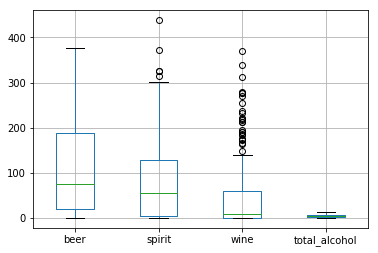

In [11]:
drinks.boxplot();

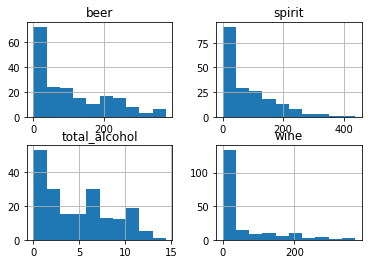

In [12]:
drinks.hist();


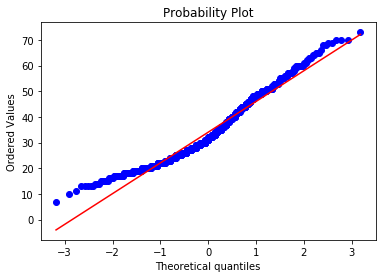

In [13]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(users.age, dist="norm", plot=pylab)
pylab.show()

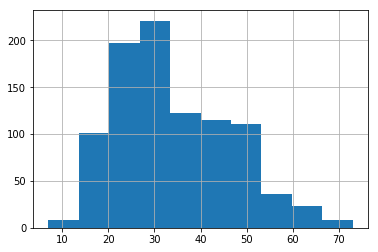

In [14]:
users.age.hist()

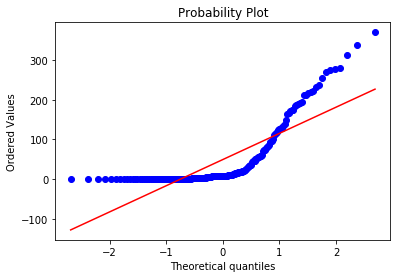

In [15]:
stats.probplot(drinks.wine, dist="norm", plot=pylab)
pylab.show()

In [ ]:
drinks.wine.hist()

#### Multivariate Non-Graphical


In [17]:
ct = pd.crosstab(users.occupation, users.gender)

In [18]:
type(ct)

pandas.core.frame.DataFrame

In [19]:
pd.crosstab(users.occupation, users.gender, margins=True)

gender,F,M,All
occupation,,,
administrator,36,43,79
artist,13,15,28
doctor,0,7,7
educator,26,69,95
engineer,2,65,67
entertainment,2,16,18
executive,3,29,32
healthcare,11,5,16
homemaker,6,1,7


In [20]:
df = pd.crosstab(users.occupation, users.gender)

In [21]:
df.columns

Index(['F', 'M'], dtype='object', name='gender')

In [22]:
df['PctF'] = df.F / (df.F + df.M)

In [23]:
df

gender,F,M,PctF
occupation,,,
administrator,36,43,0.455696
artist,13,15,0.464286
doctor,0,7,0.000000
educator,26,69,0.273684
engineer,2,65,0.029851
entertainment,2,16,0.111111
executive,3,29,0.093750
healthcare,11,5,0.687500
homemaker,6,1,0.857143


In [24]:
drinks.corr()

,beer,spirit,wine,total_alcohol
beer,1.000000,0.458819,0.527172,0.835839
spirit,0.458819,1.000000,0.194797,0.654968
wine,0.527172,0.194797,1.000000,0.667598
total_alcohol,0.835839,0.654968,0.667598,1.000000


#### Scatter Plots

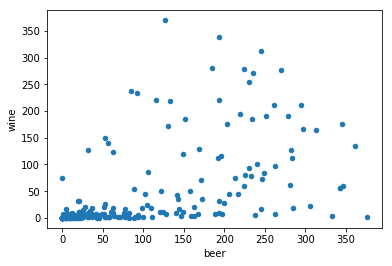

In [25]:
drinks.plot(kind='scatter', x='beer', y='wine');

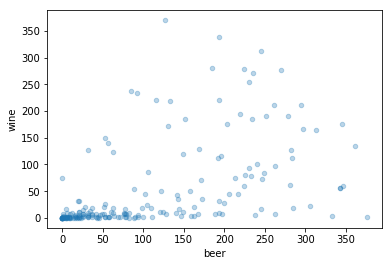

In [26]:
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3);

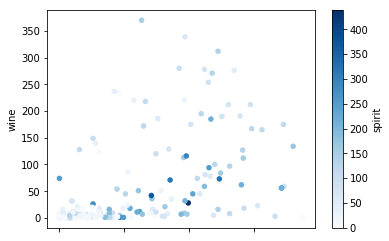

In [27]:
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues');

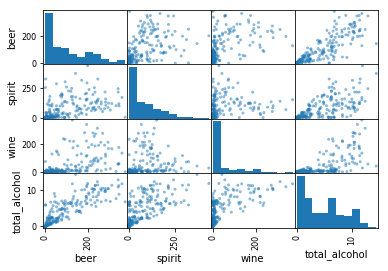

In [28]:
pd.plotting.scatter_matrix(drinks);

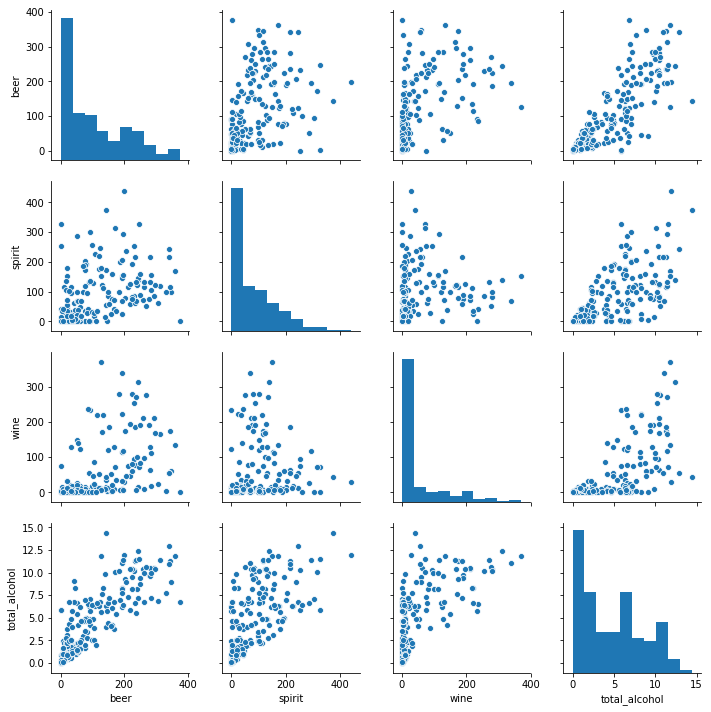

In [30]:
import seaborn as sns
sns.pairplot(drinks)

#### Bar Charts

In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country          193 non-null object
beer             193 non-null int32
spirit           193 non-null int32
wine             193 non-null int32
total_alcohol    193 non-null float64
continent        170 non-null object
dtypes: float64(1), int32(3), object(2)
memory usage: 6.9+ KB


In [6]:
drinks.head()

,country,beer,spirit,wine,total_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
#Univariate, count by categorical variable -- how is this different from a histogram?
drinks.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

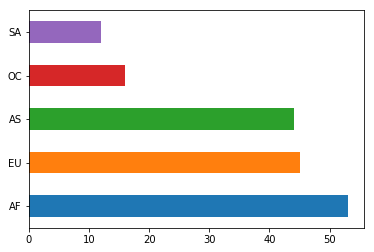

In [9]:
# Use barh for horizontal
drinks.continent.value_counts().plot(kind='barh');

In [10]:
# Calculate the mean alcohol amounts for each continent.
#   -- also sum, count, max, min
drinks.groupby('continent').mean()

,beer,spirit,wine,total_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [12]:
type(drinks.groupby('continent').mean())

pandas.core.frame.DataFrame

In [11]:
drinks.groupby('continent').mean().reset_index()

,continent,beer,spirit,wine,total_alcohol
0,AF,61.471698,16.339623,16.264151,3.007547
1,AS,37.045455,60.840909,9.068182,2.170455
2,EU,193.777778,132.555556,142.222222,8.617778
3,OC,89.687500,58.437500,35.625000,3.381250
4,SA,175.083333,114.750000,62.416667,6.308333


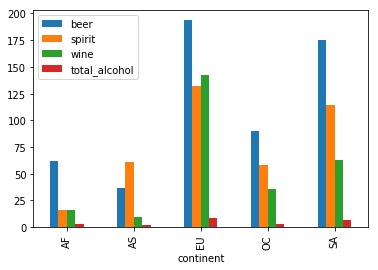

In [13]:
drinks.groupby('continent').mean().plot(kind='bar');

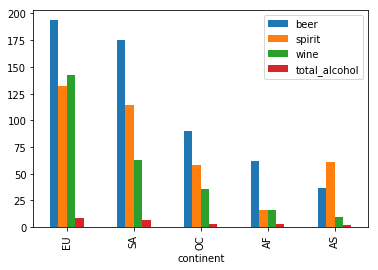

In [14]:
# That was sorted by continent -- sort by beer instead
drinks.groupby('continent').mean().sort_values('beer', ascending=False).plot(kind='bar');

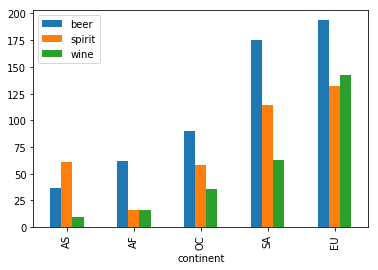

In [16]:
#  The liters column is out of scale, and it is not comparable to the others anyway!
#  Notice we make adjustments in the data frame, not by customizing the plot
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().drop('total_alcohol', axis=1).sort_values('beer').plot(kind='bar');

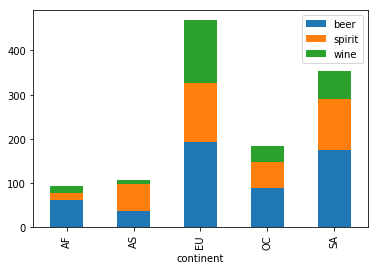

In [18]:
# Stacked bar plot (with the liters comparison removed)
drinks.groupby('continent').mean().drop('total_alcohol', axis=1).plot(kind='bar', stacked=True);